<a href="https://colab.research.google.com/github/Piyati/Piyatida/blob/main/Digital_Image_Final_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Digital Image Final Project** 

## **(Histopathologic Image Classification of Benign Fibro-Osseous Lesions of the Jaws Group)**

P => Piecewise Linear Contrast Stretching

GHE => Global Histogram Equalization

CLAHE => Contrast Limited Adaptive Histogram Equalization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import glob
import keras
import sklearn
import cv2 as cv2
import numpy as np
import pandas as pd
import PIL as Image
import seaborn as sns
import pathlib as path
import tensorflow as tf
import matplotlib as mpl
from datetime import datetime
import matplotlib.image as img
from keras import backend as k
from keras.models import Model
import matplotlib.pyplot as plt
from keras.utils import np_utils 
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import fashion_mnist
from keras.layers.convolutional import  MaxPooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras import models, layers, optimizers, callbacks
from sklearn.metrics import confusion_matrix, classification_report
from  tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.utils import to_categorical, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, ReLU,Flatten,Activation, GlobalAveragePooling2D, Input
%matplotlib inline

#Convert Image


##Convert RGB to Grayscale

###train set

In [ ]:
data_train_ce = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Original_image/train_cell/Cemento'
gray_train_ce = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Gray Scale/train_gray_scale/Cemento_train_gray'
try:
    makedirs(gray_train_ce)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(data_train_ce)

for image in files:
    img = cv2.imread(os.path.join(data_train_ce,image))
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Convert RGB image to Gray-scale
    cv2.imwrite(os.path.join(gray_train_ce,image),gray)

Directory already exist, images will be written in asme folder


In [ ]:
data_train_fi = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Original_image/train_cell/Fibrous'
gray_train_fi = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Gray Scale/train_gray_scale/Fibrous_train_gray'

try:
    makedirs(gray_train_fi)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(data_train_fi)

for image in files:
    img = cv2.imread(os.path.join(data_train_fi,image))
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Convert RGB image to Gray-scale
    cv2.imwrite(os.path.join(gray_train_fi,image),gray)

In [ ]:
data_train_os = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Original_image/train_cell/Ossifying'
gray_train_os = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Gray Scale/train_gray_scale/Ossifying_train_gray'
try:
    makedirs(gray_train_os)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(data_train_os)

for image in files:
    img = cv2.imread(os.path.join(data_train_os,image))
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Convert RGB image to Gray-scale
    cv2.imwrite(os.path.join(gray_train_os,image),gray)

###test set

In [ ]:
data_test_ce = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Original_image/test_cell/Cemento'
gray_test_ce = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Gray Scale/test_gray_scale/Cemento_test_gray'
try:
    makedirs(gray_test_ce)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(data_test_ce)

for image in files:
    img = cv2.imread(os.path.join(data_test_ce,image))
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Convert RGB image to Gray-scale
    cv2.imwrite(os.path.join(gray_test_ce,image),gray)

In [ ]:
data_test_fi = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Original_image/test_cell/Fibrous'
gray_test_fi = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Gray Scale/test_gray_scale/Fibrous_test_gray'
try:
    makedirs(gray_test_fi)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(data_test_fi)

for image in files:
    img = cv2.imread(os.path.join(data_test_fi,image))
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Convert RGB image to Gray-scale
    cv2.imwrite(os.path.join(gray_test_fi,image),gray)

In [ ]:
data_test_os =  '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Original_image/test_cell/Ossifying'
gray_test_os = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Gray Scale/test_gray_scale/Ossifying_test_gray'
try:
    makedirs(gray_test_os)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(data_test_os)

for image in files:
    img = cv2.imread(os.path.join(data_test_os,image))
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Convert RGB image to Gray-scale
    cv2.imwrite(os.path.join(gray_test_os,image),gray)

##Convert Grayscale to GHE

###train set

In [ ]:
gray_train_ce = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Gray Scale/train_gray_scale/Cemento_train_gray'
ghe_train_ce = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/GHE/train_GHE/Cemento_train_GHE'
try:
    makedirs(ghe_train_ce)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(gray_train_ce)

for image in files:
    img1 = cv2_imshow.imread(os.path.join(gray_train_ce,image))
    #img1 = np.uint8(image)
    gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    img_his = cv2.equalizeHist(gray1)
    cv2.imwrite(os.path.join(ghe_train_ce,image),img_his)

In [ ]:
gray_train_fi = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Gray Scale/train_gray_scale/Fibrous_train_gray'
ghe_train_fi ='/content/drive/MyDrive/Digital Image Project/Old_Data_Set/GHE/train_GHE/Fibrous_train_GHE'
try:
    makedirs(ghe_train_fi)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(gray_train_fi)

for image in files:
    img1 = cv2.imread(os.path.join(gray_train_fi,image))
    #img1 = np.uint8(image)
    gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    img_his = cv2.equalizeHist(gray1)
    cv2.imwrite(os.path.join(ghe_train_fi,image),img_his)

In [ ]:
gray_train_os = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Gray Scale/train_gray_scale/Ossifying_train_gray' 
ghe_train_os = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/GHE/train_GHE/Ossifying_train_GHE'
try:
    makedirs(ghe_train_os)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(gray_train_os)

for image in files:
    img1 = cv2.imread(os.path.join(gray_train_os,image))
    #img1 = np.uint8(image)
    gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    img_his = cv2.equalizeHist(gray1)
    cv2.imwrite(os.path.join(ghe_train_os,image),img_his)

###test set

In [ ]:
gray_test_ce = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Gray Scale/test_gray_scale/Cemento_test_gray'
ghe_test_ce = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/GHE/test_GHE/Cemento_test_GHE'
try:
    makedirs(ghe_test_ce)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(gray_test_ce)

for image in files:
    img1 = cv2.imread(os.path.join(gray_test_ce,image))
    #img1 = np.uint8(image)
    gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    img_his = cv2.equalizeHist(gray1)
    cv2.imwrite(os.path.join(ghe_test_ce,image),img_his)

In [ ]:
gray_test_fi = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Gray Scale/test_gray_scale/Fibrous_test_gray'
ghe_test_fi = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/GHE/test_GHE/Fibrous_test_GHE'
try:
    makedirs(ghe_test_fi)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(gray_test_fi)

for image in files:
    img1 = cv2.imread(os.path.join(gray_test_fi,image))
    #img1 = np.uint8(image)
    gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    img_his = cv2.equalizeHist(gray1)
    cv2.imwrite(os.path.join(ghe_test_fi,image),img_his)

In [ ]:
gray_test_os = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Gray Scale/test_gray_scale/Ossifying_test_gray'
ghe_test_os = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/GHE/test_GHE/Ossifying_test_GHE'
try:
    makedirs(ghe_test_os)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(gray_test_os)

for image in files:
    img1 = cv2.imread(os.path.join(gray_test_os,image))
    #img1 = np.uint8(image)
    gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    img_his = cv2.equalizeHist(gray1)
    cv2.imwrite(os.path.join(ghe_test_os,image),img_his)

##Convert Grayscale to CLAHE

###train set

In [ ]:
gray_train_ce = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Gray Scale/train_gray_scale/Cemento_train_gray'
clahe_train_ce = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/CLAHE/train_CLAHE/Cemento_train_CLAHE'

try:
    makedirs(clahe_train_ce)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(gray_train_ce)

for image in files:
    img2 = cv2.imread(os.path.join(gray_train_ce,image))
    gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    
    clahe = cv2.createCLAHE(clipLimit = 9, tileGridSize=(8,8))

    img_clahe = clahe.apply(gray)
    cv2.imwrite(os.path.join(clahe_train_ce,image),img_clahe)

In [ ]:
gray_train_fi = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Gray Scale/train_gray_scale/Fibrous_train_gray'
clahe_train_fi = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/CLAHE/train_CLAHE/Fibrous_train_CLAHE'

try:
    makedirs(clahe_train_fi)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(gray_train_fi)

for image in files:
    img2 = cv2.imread(os.path.join(gray_train_fi,image))
    gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    
    clahe = cv2.createCLAHE(clipLimit = 9, tileGridSize=(8,8))

    img_clahe = clahe.apply(gray)
    cv2.imwrite(os.path.join(clahe_train_fi,image),img_clahe)

In [ ]:
gray_train_os = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Gray Scale/train_gray_scale/Ossifying_train_gray'
clahe_train_os = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/CLAHE/train_CLAHE/Ossifying_train_CLAHE'

try:
    makedirs(clahe_train_os)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(gray_train_os)

for image in files:
    img2 = cv2.imread(os.path.join(gray_train_os,image))
    gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    
    clahe = cv2.createCLAHE(clipLimit = 9, tileGridSize=(8,8))

    img_clahe = clahe.apply(gray)
    cv2.imwrite(os.path.join(clahe_train_os,image),img_clahe)

###test set

In [ ]:
gray_test_ce = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Gray Scale/test_gray_scale/Cemento_test_gray'
clahe_test_ce = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/CLAHE/test_CLAHE/Cemento_test_CLAHE'

try:
    makedirs(clahe_test_ce)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(gray_test_ce)

for image in files:
    img2 = cv2.imread(os.path.join(gray_test_ce,image))
    gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    
    clahe = cv2.createCLAHE(clipLimit = 9, tileGridSize=(8,8))

    img_clahe = clahe.apply(gray)
    cv2.imwrite(os.path.join(clahe_test_ce,image),img_clahe)

In [ ]:
gray_test_fi = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Gray Scale/test_gray_scale/Fibrous_test_gray'
clahe_test_fi = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/CLAHE/test_CLAHE/Fibrous_test_CLAHE'

try:
    makedirs(clahe_test_fi)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(gray_test_fi)

for image in files:
    img2 = cv2.imread(os.path.join(gray_test_fi,image))
    gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    
    clahe = cv2.createCLAHE(clipLimit = 9, tileGridSize=(8,8))

    img_clahe = clahe.apply(gray)
    cv2.imwrite(os.path.join(clahe_test_fi,image),img_clahe)

In [ ]:
gray_test_os = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Gray Scale/test_gray_scale/Ossifying_test_gray'
clahe_test_os = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/CLAHE/test_CLAHE/Ossifying_test_CLAHE'

try:
    makedirs(clahe_test_os)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(gray_test_os)

for image in files:
    img2 = cv2.imread(os.path.join(gray_test_os,image))
    gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    
    clahe = cv2.createCLAHE(clipLimit = 9, tileGridSize=(8,8))

    img_clahe = clahe.apply(gray)
    cv2.imwrite(os.path.join(clahe_test_os,image),img_clahe)

##GHE and Piecewise-Linear 

In [ ]:
def pixelVal(pix, r1, s1, r2, s2): 
    if (0 <= pix and pix <= r1): 
        return (s1/r1)*pix 
    elif (r1 < pix and pix <= r2): 
        return ((s2-s1)/(r2-r1)) * (pix-r1) + s1 
    else: 
        return ((255-s2)/(255-r2)) * (pix-r2) + s2

###trsin set

In [ ]:
ghe_train_ce = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/GHE/train_GHE/Cemento_train_GHE'
ghe_p_train_ce ='/content/drive/MyDrive/Digital Image Project/Old_Data_Set/GHE + P/train_ghe+p/Cemento_train_GHE+P'
try:
    makedirs(ghe_p_train_ce)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(ghe_train_ce)

for image in files:
    img2 = cv2.imread(os.path.join(ghe_train_ce,image))
    r1 =60
    s1 = 0
    r2= 210
    s2 = 255
    pixelVal_vec = np.vectorize(pixelVal)
    img_contrast_stretched = pixelVal_vec(img2, r1, s1, r2, s2)
    
    cv2.imwrite(os.path.join(ghe_p_train_ce,image),img_contrast_stretched)

In [ ]:
ghe_train_fi = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/GHE/train_GHE/Fibrous_train_GHE'
ghe_p_train_fi ='/content/drive/MyDrive/Digital Image Project/Old_Data_Set/GHE + P/train_ghe+p/Fibrous_train_GHE+P'
try:
    makedirs(ghe_p_train_fi)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(ghe_train_fi)

for image in files:
    img2 = cv2.imread(os.path.join(ghe_train_fi,image))
    r1 =60
    s1 = 0
    r2= 210
    s2 = 255
    pixelVal_vec = np.vectorize(pixelVal)
    img_contrast_stretched = pixelVal_vec(img2, r1, s1, r2, s2)
    
    cv2.imwrite(os.path.join(ghe_p_train_fi,image),img_contrast_stretched)

In [ ]:
ghe_train_os = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/GHE/train_GHE/Ossifying_train_GHE'
ghe_p_train_os ='/content/drive/MyDrive/Digital Image Project/Old_Data_Set/GHE + P/train_ghe+p/Ossifying_train_GHE+P'
try:
    makedirs(ghe_p_train_os)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(ghe_train_os)

for image in files:
    img2 = cv2.imread(os.path.join(ghe_train_os,image))
    r1 =60
    s1 = 0
    r2= 210
    s2 = 255
    pixelVal_vec = np.vectorize(pixelVal)
    img_contrast_stretched = pixelVal_vec(img2, r1, s1, r2, s2)
    
    cv2.imwrite(os.path.join(ghe_p_train_os,image),img_contrast_stretched)

###test set

In [ ]:
ghe_test_ce = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/GHE/test_GHE/Cemento_test_GHE'
ghe_p_test_ce ='/content/drive/MyDrive/Digital Image Project/Old_Data_Set/GHE + P/test_ghe+p/Cemento_test_GHE+P'
try:
    makedirs(ghe_p_test_ce)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(ghe_test_ce)

for image in files:
    img2 = cv2.imread(os.path.join(ghe_test_ce,image))
    r1 =60
    s1 = 0
    r2= 210
    s2 = 255
    pixelVal_vec = np.vectorize(pixelVal)
    img_contrast_stretched = pixelVal_vec(img2, r1, s1, r2, s2)
    
    cv2.imwrite(os.path.join(ghe_p_test_ce,image),img_contrast_stretched)

In [ ]:
ghe_test_fi = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/GHE/test_GHE/Fibrous_test_GHE'
ghe_p_test_fi ='/content/drive/MyDrive/Digital Image Project/Old_Data_Set/GHE + P/test_ghe+p/Fibrous_test_GHE+P'
try:
    makedirs(ghe_p_test_fi)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(ghe_test_fi)

for image in files:
    img2 = cv2.imread(os.path.join(ghe_test_fi,image))
    r1 =60
    s1 = 0
    r2= 210
    s2 = 255
    pixelVal_vec = np.vectorize(pixelVal)
    img_contrast_stretched = pixelVal_vec(img2, r1, s1, r2, s2)
    
    cv2.imwrite(os.path.join(ghe_p_test_fi,image),img_contrast_stretched)

In [ ]:
ghe_test_os = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/GHE/test_GHE/Ossifying_test_GHE'
ghe_p_test_os ='/content/drive/MyDrive/Digital Image Project/Old_Data_Set/GHE + P/test_ghe+p/Ossifying_test_GHE+P'
try:
    makedirs(ghe_p_test_os)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(ghe_test_os)

for image in files:
    img2 = cv2.imread(os.path.join(ghe_test_os,image))
    r1 =60
    s1 = 0
    r2= 210
    s2 = 255
    pixelVal_vec = np.vectorize(pixelVal)
    img_contrast_stretched = pixelVal_vec(img2, r1, s1, r2, s2)
    
    cv2.imwrite(os.path.join(ghe_p_test_os,image),img_contrast_stretched)

##CLAHE and Piecewise-Linear 

###Train Set

In [ ]:
clahe_train_ce = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/CLAHE/train_CLAHE/Cemento_train_CLAHE'
clahe_p_train_ce ='/content/drive/MyDrive/Digital Image Project/Old_Data_Set/CLAHE + P/train_CLAHE+P/Cemento_train_CLAHE+P'
try:
    makedirs(clahe_p_train_ce)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(clahe_train_ce)

for image in files:
    img2 = cv2.imread(os.path.join(clahe_train_ce,image))
    r1 =60
    s1 = 0
    r2= 210
    s2 = 255
    pixelVal_vec = np.vectorize(pixelVal)
    img_contrast_stretched = pixelVal_vec(img2, r1, s1, r2, s2)
    
    cv2.imwrite(os.path.join(clahe_p_train_ce,image),img_contrast_stretched)

In [ ]:
clahe_train_fi = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/CLAHE/train_CLAHE/Fibrous_train_CLAHE'
clahe_p_train_fi ='/content/drive/MyDrive/Digital Image Project/Old_Data_Set/CLAHE + P/train_CLAHE+P/Fibrous_train_CLAHE+P'
try:
    makedirs(clahe_p_train_fi)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(clahe_train_fi)

for image in files:
    img2 = cv2.imread(os.path.join(clahe_train_fi,image))
    r1 =60
    s1 = 0
    r2= 210
    s2 = 255
    pixelVal_vec = np.vectorize(pixelVal)
    img_contrast_stretched = pixelVal_vec(img2, r1, s1, r2, s2)
    
    cv2.imwrite(os.path.join(clahe_p_train_fi,image),img_contrast_stretched)

In [ ]:
clahe_train_os = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/CLAHE/train_CLAHE/Ossifying_train_CLAHE'
clahe_p_train_os ='/content/drive/MyDrive/Digital Image Project/Old_Data_Set/CLAHE + P/train_CLAHE+P/Ossifying_train_CLAHE+P'
try:
    makedirs(clahe_p_train_os)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(clahe_train_os)

for image in files:
    img2 = cv2.imread(os.path.join(clahe_train_os,image))
    r1 =60
    s1 = 0
    r2= 210
    s2 = 255
    pixelVal_vec = np.vectorize(pixelVal)
    img_contrast_stretched = pixelVal_vec(img2, r1, s1, r2, s2)
    
    cv2.imwrite(os.path.join(clahe_p_train_os,image),img_contrast_stretched)

###Test Set

In [ ]:
clahe_test_ce = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/CLAHE/test_CLAHE/Cemento_test_CLAHE'
clahe_p_test_ce ='/content/drive/MyDrive/Digital Image Project/Old_Data_Set/CLAHE + P/test_CLAHE+P/Cemento_test_CLAHE+P'
try:
    makedirs(clahe_p_test_ce)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(clahe_test_ce)

for image in files:
    img2 = cv2.imread(os.path.join(clahe_test_ce,image))
    r1 =60
    s1 = 0
    r2= 210
    s2 = 255
    pixelVal_vec = np.vectorize(pixelVal)
    img_contrast_stretched = pixelVal_vec(img2, r1, s1, r2, s2)
    
    cv2.imwrite(os.path.join(clahe_p_test_ce,image),img_contrast_stretched)

In [ ]:
clahe_test_fi = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/CLAHE/test_CLAHE/Fibrous_test_CLAHE'
clahe_p_test_fi ='/content/drive/MyDrive/Digital Image Project/Old_Data_Set/CLAHE + P/test_CLAHE+P/Fibrous_test_CLAHE+P'
try:
    makedirs(clahe_p_test_fi)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(clahe_test_fi)

for image in files:
    img2 = cv2.imread(os.path.join(clahe_test_fi,image))
    r1 =60
    s1 = 0
    r2= 210
    s2 = 255
    pixelVal_vec = np.vectorize(pixelVal)
    img_contrast_stretched = pixelVal_vec(img2, r1, s1, r2, s2)
    
    cv2.imwrite(os.path.join(clahe_p_test_fi,image),img_contrast_stretched)

In [ ]:
clahe_test_os = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/CLAHE/test_CLAHE/Ossifying_test_CLAHE'
clahe_p_test_os ='/content/drive/MyDrive/Digital Image Project/Old_Data_Set/CLAHE + P/test_CLAHE+P/Ossifying_test_CLAHE+P'
try:
    makedirs(clahe_p_test_os)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = os.listdir(clahe_test_os)

for image in files:
    img2 = cv2.imread(os.path.join(clahe_test_os,image))
    r1 =60
    s1 = 0
    r2= 210
    s2 = 255
    pixelVal_vec = np.vectorize(pixelVal)
    img_contrast_stretched = pixelVal_vec(img2, r1, s1, r2, s2)
    
    cv2.imwrite(os.path.join(clahe_p_test_os,image),img_contrast_stretched)

#Preprocess Data

In [ ]:
IMAGE_SIZE = [224,224]
train_datagen = ImageDataGenerator(
                            rescale=1./255, #rescal Grayscale
                            horizontal_flip = True,
                            vertical_flip = True,
                            validation_split = 0.2
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255, validation_split = 0.2
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

#Model ResNet50

#------------------------------------Grayscale-------------------------

###Grayscale

In [ ]:
test_Path_gray = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Gray Scale/test_gray_scale'
train_Path_gray =  '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Gray Scale/train_gray_scale'

In [ ]:
training_set_gray = train_datagen.flow_from_directory(
    train_Path_gray,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical')



validation_set_gray = validation_datagen.flow_from_directory(
    train_Path_gray,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical')



test_set_gray = test_datagen.flow_from_directory(
    test_Path_gray,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical'
)

###Model Grayscale

In [ ]:
resnet = ResNet50(
    input_shape = IMAGE_SIZE + [3], #......
    weights = 'imagenet', 
    include_top = False )

94765736/94765736 [==============================] - 6s 0us/step


In [ ]:
for layer in resnet.layers:
    layer.trainable = False
import glob
folders_gray = glob.glob(train_Path_gray + '/*')
folders_gray

['/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Gray Scale/train_gray_scale/Cemento_train_gray',
 '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Gray Scale/train_gray_scale/Fibrous_train_gray',
 '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/Gray Scale/train_gray_scale/Ossifying_train_gray']

In [ ]:
x = Flatten() (resnet.output)
prediction = Dense(len(folders_gray), activation = 'softmax')(x)
resnet50_model = Model(inputs = resnet.input, outputs = prediction)
resnet50_model.compile (
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
print(len(resnet50_model.layers))

177


###Train model Grayscale 

In [ ]:
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=2) 
mcp_save = ModelCheckpoint('history_resnet50_model_gray_earlystop.h5', save_best_only=True, monitor='val_loss')

history_resnet50_model_gray_earlystop = resnet50_model.fit(
                      training_set_gray,
                      batch_size=32,
                      epochs=20,
                      validation_data = (validation_set_gray),
                      callbacks=[early_stop,mcp_save]
                      )

Epoch 1/20
15/15 [==============================] - 461s 30s/step - loss: 4.8186 - accuracy: 0.4522 - val_loss: 1.1959 - val_accuracy: 0.6043
Epoch 2/20
15/15 [==============================] - 23s 2s/step - loss: 1.4212 - accuracy: 0.5674 - val_loss: 1.4461 - val_accuracy: 0.5043
Epoch 3/20
15/15 [==============================] - 23s 2s/step - loss: 1.1032 - accuracy: 0.6065 - val_loss: 1.2604 - val_accuracy: 0.5413


###Evaluation

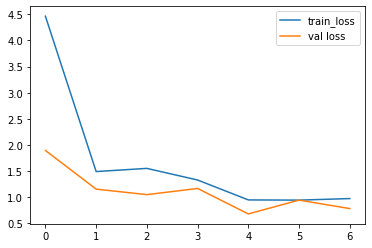

In [ ]:
plt.plot(history_resnet50_model_gray_earlystop.history['loss'], label = 'train_loss')
plt.plot(history_resnet50_model_gray_earlystop.history['val_loss'], label ='val loss')
plt.legend()
plt.show()

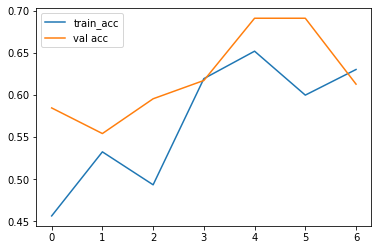

In [ ]:
plt.plot(history_resnet50_model_gray_earlystop.history['accuracy'], label = 'train_acc')
plt.plot(history_resnet50_model_gray_earlystop.history['val_accuracy'], label ='val acc')
plt.legend()
plt.show()

In [ ]:
model_gray_earlystop = load_model('history_resnet50_model_gray_earlystop.h5')
score1 = model_gray_earlystop.evaluate(training_set_gray)
score1

15/15 [==============================] - 12s 698ms/step - loss: 0.6891 - accuracy: 0.7152


[0.6890811920166016, 0.7152174115180969]

In [ ]:
score2 = model_gray_earlystop.evaluate(test_set_gray)
score2

2/2 [==============================] - 13s 12s/step - loss: 1.0169 - accuracy: 0.5778


[1.0168765783309937, 0.5777778029441833]

#------------------------------GHE----------------------------------------

###GHE

In [ ]:
test_Path_GHE = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/GHE/test_GHE'
train_Path_GHE =  '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/GHE/train_GHE'

In [ ]:
training_set_GHE = train_datagen.flow_from_directory(
    train_Path_GHE,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical')



validation_set_GHE = validation_datagen.flow_from_directory(
    train_Path_GHE,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical')



test_set_GHE = test_datagen.flow_from_directory(
    test_Path_GHE,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical'
)

Found 449 images belonging to 3 classes.
Found 449 images belonging to 3 classes.
Found 45 images belonging to 3 classes.


###Model GHE

In [ ]:
for layer in resnet.layers:
    layer.trainable = False
import glob
folders_GHE = glob.glob(train_Path_GHE + '/*')
folders_GHE

['/content/drive/MyDrive/Digital Image Project/Old_Data_Set/GHE/train_GHE/Cemento_train_GHE',
 '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/GHE/train_GHE/Fibrous_train_GHE',
 '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/GHE/train_GHE/Ossifying_train_GHE']

In [ ]:
x = Flatten() (resnet.output)
prediction = Dense(len(folders_GHE), activation = 'softmax')(x)
resnet50_model = Model(inputs = resnet.input, outputs = prediction)
resnet50_model.compile (
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

###Train model GHE

In [ ]:
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=2) 
mcp_save = ModelCheckpoint('history_resnet50_model_GHE_earlystop.h5', save_best_only=True, monitor='val_loss')

history_resnet50_model_GHE_earlystop = resnet50_model.fit(
                      training_set_GHE,
                      batch_size=32,
                      epochs=20,
                      validation_data = (validation_set_GHE),
                      callbacks=[early_stop,mcp_save]
                      )

Epoch 1/20
15/15 [==============================] - 123s 8s/step - loss: 5.3736 - accuracy: 0.4254 - val_loss: 5.1782 - val_accuracy: 0.5857
Epoch 2/20
15/15 [==============================] - 22s 2s/step - loss: 2.7022 - accuracy: 0.5145 - val_loss: 0.8286 - val_accuracy: 0.6927
Epoch 3/20
15/15 [==============================] - 21s 2s/step - loss: 1.3127 - accuracy: 0.6036 - val_loss: 1.0455 - val_accuracy: 0.6370
Epoch 4/20
15/15 [==============================] - 22s 2s/step - loss: 0.9314 - accuracy: 0.6437 - val_loss: 0.7811 - val_accuracy: 0.6459
Epoch 5/20
15/15 [==============================] - 21s 1s/step - loss: 0.9580 - accuracy: 0.6125 - val_loss: 0.8912 - val_accuracy: 0.5813
Epoch 6/20
15/15 [==============================] - 22s 2s/step - loss: 0.7041 - accuracy: 0.7194 - val_loss: 0.4573 - val_accuracy: 0.8218
Epoch 7/20
15/15 [==============================] - 23s 2s/step - loss: 0.5660 - accuracy: 0.7906 - val_loss: 0.4566 - val_accuracy: 0.8196
Epoch 8/20
15/15 [=

###Evaluation

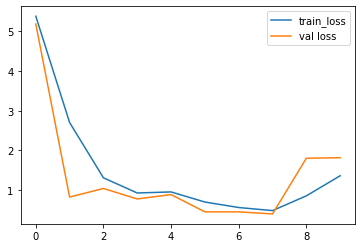

In [ ]:
plt.plot(history_resnet50_model_GHE_earlystop.history['loss'], label = 'train_loss')
plt.plot(history_resnet50_model_GHE_earlystop.history['val_loss'], label ='val loss')
plt.legend()
plt.show()

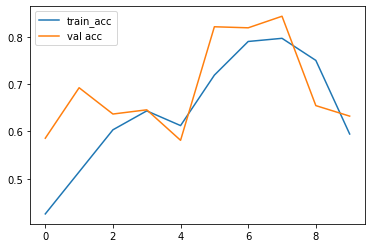

In [ ]:
plt.plot(history_resnet50_model_GHE_earlystop.history['accuracy'], label = 'train_acc')
plt.plot(history_resnet50_model_GHE_earlystop.history['val_accuracy'], label ='val acc')
plt.legend()
plt.show()

In [ ]:
model_GHE_earlystop = load_model('history_resnet50_model_GHE_earlystop.h5')
score3 = model_GHE_earlystop.evaluate(training_set_GHE)
score3

15/15 [==============================] - 12s 700ms/step - loss: 0.4137 - accuracy: 0.8441


[0.41369983553886414, 0.8440979719161987]

In [ ]:
score4 =  model_GHE_earlystop.evaluate(test_set_GHE)
score4

2/2 [==============================] - 8s 7s/step - loss: 0.8979 - accuracy: 0.6889


[0.8978961706161499, 0.6888889074325562]

#---------------------------------CLAHE------------------------------------------------

###CLAHE

In [ ]:
test_Path_CLAHE = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/CLAHE/test_CLAHE'
train_Path_CLAHE = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/CLAHE/train_CLAHE'

In [ ]:
training_set_CLAHE = train_datagen.flow_from_directory(
    train_Path_CLAHE,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical')



validation_set_CLAHE = validation_datagen.flow_from_directory(
    train_Path_CLAHE,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical')



test_set_CLAHE = test_datagen.flow_from_directory(
    test_Path_CLAHE,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical'
)

Found 460 images belonging to 3 classes.
Found 460 images belonging to 3 classes.
Found 45 images belonging to 3 classes.


###Model CLAHE

In [ ]:
for layer in resnet.layers:
    layer.trainable = False
import glob
folders_CLAHE = glob.glob(train_Path_CLAHE + '/*')
folders_CLAHE

['/content/drive/MyDrive/Digital Image Project/Old_Data_Set/CLAHE/train_CLAHE/Ossifying_train_CLAHE',
 '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/CLAHE/train_CLAHE/Fibrous_train_CLAHE',
 '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/CLAHE/train_CLAHE/Cemento_train_CLAHE']

In [ ]:
x = Flatten() (resnet.output)
prediction = Dense(len(folders_CLAHE), activation = 'softmax')(x)
resnet50_model = Model(inputs = resnet.input, outputs = prediction)
resnet50_model.compile (
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

###Train model CLAHE

In [ ]:
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=2) 
mcp_save = ModelCheckpoint('history_resnet50_model_CLAHE_earlystop.h5', save_best_only=True, monitor='val_loss')

history_resnet50_model_CLAHE_earlystop = resnet50_model.fit(
                      training_set_CLAHE,
                      batch_size=32,
                      epochs=20,
                      validation_data = (validation_set_CLAHE),
                      callbacks=[early_stop,mcp_save]
                      )

Epoch 1/20
15/15 [==============================] - 132s 9s/step - loss: 3.4975 - accuracy: 0.4435 - val_loss: 1.3099 - val_accuracy: 0.6022
Epoch 2/20
15/15 [==============================] - 27s 2s/step - loss: 1.3310 - accuracy: 0.5565 - val_loss: 0.7454 - val_accuracy: 0.6565
Epoch 3/20
15/15 [==============================] - 26s 2s/step - loss: 0.5910 - accuracy: 0.7739 - val_loss: 0.5146 - val_accuracy: 0.8087
Epoch 4/20
15/15 [==============================] - 26s 2s/step - loss: 0.5149 - accuracy: 0.8000 - val_loss: 0.4753 - val_accuracy: 0.8348
Epoch 5/20
15/15 [==============================] - 26s 2s/step - loss: 0.4773 - accuracy: 0.8261 - val_loss: 0.4562 - val_accuracy: 0.8261
Epoch 6/20
15/15 [==============================] - 25s 2s/step - loss: 0.4832 - accuracy: 0.8283 - val_loss: 0.6539 - val_accuracy: 0.7283
Epoch 7/20
15/15 [==============================] - 26s 2s/step - loss: 0.4804 - accuracy: 0.8304 - val_loss: 0.3909 - val_accuracy: 0.8522
Epoch 8/20
15/15 [=

###Evaluation

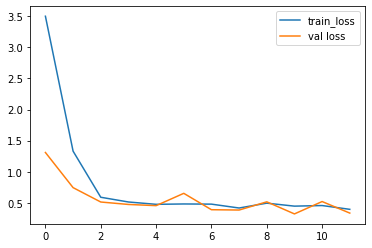

In [ ]:
plt.plot(history_resnet50_model_CLAHE_earlystop.history['loss'], label = 'train_loss')
plt.plot(history_resnet50_model_CLAHE_earlystop.history['val_loss'], label ='val loss')
plt.legend()
plt.show()

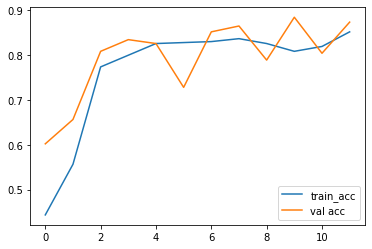

In [ ]:
plt.plot(history_resnet50_model_CLAHE_earlystop.history['accuracy'], label = 'train_acc')
plt.plot(history_resnet50_model_CLAHE_earlystop.history['val_accuracy'], label ='val acc')
plt.legend()
plt.show()

In [ ]:
model_CLAHE_earlystop = load_model('history_resnet50_model_CLAHE_earlystop.h5')
score5 = model_CLAHE_earlystop.evaluate(training_set_CLAHE)
score5

15/15 [==============================] - 14s 835ms/step - loss: 0.3523 - accuracy: 0.8674


[0.3523249328136444, 0.8673912882804871]

In [ ]:
score6 = model_CLAHE_earlystop.evaluate(test_set_CLAHE)
score6

2/2 [==============================] - 1s 364ms/step - loss: 0.5711 - accuracy: 0.7556


[0.5711084008216858, 0.7555555701255798]

#--------------------------GHE + Piecewise------------------------------

###GHE + Piecewise

In [ ]:
test_Path_GHE_P = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/GHE + P/test_ghe+p'
train_Path_GHE_P = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/GHE + P/train_ghe+p'

In [ ]:
training_set_GHE_P = train_datagen.flow_from_directory(
    train_Path_GHE_P,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical')



validation_set_GHE_P = validation_datagen.flow_from_directory(
    train_Path_GHE_P,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical')



test_set_GHE_P = test_datagen.flow_from_directory(
    test_Path_GHE_P,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical'
)

Found 449 images belonging to 3 classes.
Found 449 images belonging to 3 classes.
Found 45 images belonging to 3 classes.


### Model GHE + Piecewise

In [ ]:
for layer in resnet.layers:
    layer.trainable = False
import glob
folders_GHE_P = glob.glob(train_Path_GHE_P + '/*')
folders_GHE_P

['/content/drive/MyDrive/Digital Image Project/Old_Data_Set/GHE + P/train_ghe+p/Fibrous_train_GHE+P',
 '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/GHE + P/train_ghe+p/Cemento_train_GHE+P',
 '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/GHE + P/train_ghe+p/Ossifying_train_GHE+P']

In [ ]:
x = Flatten() (resnet.output)
prediction = Dense(len(folders_GHE_P), activation = 'softmax')(x)
resnet50_model = Model(inputs = resnet.input, outputs = prediction)
resnet50_model.compile (
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

###Train model GHE + Piecewise

In [ ]:
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=2) 
mcp_save = ModelCheckpoint('history_resnet50_model_GHE_P_earlystop.h5', save_best_only=True, monitor='val_loss')

history_resnet50_model_GHE_P_earlystop = resnet50_model.fit(
                      training_set_GHE_P,
                      batch_size=32,
                      epochs=20,
                      validation_data = (validation_set_GHE_P),
                      callbacks=[early_stop,mcp_save]
                      )

Epoch 1/20
15/15 [==============================] - 247s 16s/step - loss: 2.7418 - accuracy: 0.5323 - val_loss: 2.0552 - val_accuracy: 0.7105
Epoch 2/20
15/15 [==============================] - 40s 3s/step - loss: 1.8813 - accuracy: 0.6548 - val_loss: 1.0999 - val_accuracy: 0.7416
Epoch 3/20
15/15 [==============================] - 40s 3s/step - loss: 1.0433 - accuracy: 0.7171 - val_loss: 0.5344 - val_accuracy: 0.8196
Epoch 4/20
15/15 [==============================] - 41s 3s/step - loss: 0.6534 - accuracy: 0.7728 - val_loss: 0.6771 - val_accuracy: 0.7238
Epoch 5/20
15/15 [==============================] - 40s 3s/step - loss: 1.2437 - accuracy: 0.7060 - val_loss: 1.2143 - val_accuracy: 0.6192


###Evaluation

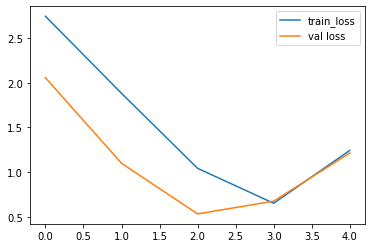

In [ ]:
plt.plot(history_resnet50_model_GHE_P_earlystop.history['loss'], label = 'train_loss')
plt.plot(history_resnet50_model_GHE_P_earlystop.history['val_loss'], label ='val loss')
plt.legend()
plt.show()

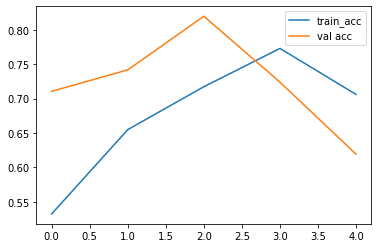

In [ ]:
plt.plot(history_resnet50_model_GHE_P_earlystop.history['accuracy'], label = 'train_acc')
plt.plot(history_resnet50_model_GHE_P_earlystop.history['val_accuracy'], label ='val acc')
plt.legend()
plt.show()

In [ ]:
model_GHE_P_earlystop = load_model('history_resnet50_model_GHE_P_earlystop.h5')
score7 = model_GHE_P_earlystop.evaluate(training_set_GHE_P)
score7

15/15 [==============================] - 21s 1s/step - loss: 0.5254 - accuracy: 0.8107


[0.5254361033439636, 0.8106904029846191]

In [ ]:
score8 = model_GHE_P_earlystop.evaluate(test_set_GHE_P)
score8

2/2 [==============================] - 11s 9s/step - loss: 1.1545 - accuracy: 0.7111


[1.1545108556747437, 0.7111111283302307]

#-----------------------------CLAHE + Piecewise--------------------------------

###CLAHE + Piecewise

In [ ]:
test_Path_CLAHE_P = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/CLAHE + P/test_CLAHE+P'
train_Path_CLAHE_P = '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/CLAHE + P/train_CLAHE+P'

In [ ]:
training_set_CLAHE_P = train_datagen.flow_from_directory(
    train_Path_CLAHE_P ,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical')



validation_set_CLAHE_P  = validation_datagen.flow_from_directory(
    train_Path_CLAHE_P ,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical')



test_set_CLAHE_P  = test_datagen.flow_from_directory(
    test_Path_CLAHE_P ,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical'
)

Found 460 images belonging to 3 classes.
Found 460 images belonging to 3 classes.
Found 45 images belonging to 3 classes.


###Model CLAHE + Piecewise

In [ ]:
for layer in resnet.layers:
    layer.trainable = False
import glob
folders_CLAHE_P = glob.glob(train_Path_CLAHE_P + '/*')
folders_CLAHE_P

['/content/drive/MyDrive/Digital Image Project/Old_Data_Set/CLAHE + P/train_CLAHE+P/Fibrous_train_CLAHE+P',
 '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/CLAHE + P/train_CLAHE+P/Ossifying_train_CLAHE+P',
 '/content/drive/MyDrive/Digital Image Project/Old_Data_Set/CLAHE + P/train_CLAHE+P/Cemento_train_CLAHE+P']

In [ ]:
x = Flatten() (resnet.output)
prediction = Dense(len(folders_CLAHE_P), activation = 'softmax')(x)
resnet50_model = Model(inputs = resnet.input, outputs = prediction)
resnet50_model.compile (
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

###Train model CLAHE + Piecewise

In [ ]:
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=2) 
mcp_save = ModelCheckpoint('history_resnet50_model_CLAHE_P_earlystop.h5', save_best_only=True, monitor='val_loss')

history_resnet50_model_CLAHE_P_earlystop = resnet50_model.fit(
                      training_set_CLAHE_P,
                      batch_size=32,
                      epochs=20,
                      validation_data = (validation_set_CLAHE_P),
                      callbacks=[early_stop,mcp_save]
                      )

Epoch 1/20
15/15 [==============================] - 50s 3s/step - loss: 0.3425 - accuracy: 0.8739 - val_loss: 0.2461 - val_accuracy: 0.8957
Epoch 2/20
15/15 [==============================] - 49s 3s/step - loss: 0.1976 - accuracy: 0.9239 - val_loss: 0.2101 - val_accuracy: 0.9196
Epoch 3/20
15/15 [==============================] - 50s 3s/step - loss: 0.1798 - accuracy: 0.9326 - val_loss: 0.1416 - val_accuracy: 0.9391
Epoch 4/20
15/15 [==============================] - 49s 3s/step - loss: 0.1740 - accuracy: 0.9391 - val_loss: 0.1508 - val_accuracy: 0.9522
Epoch 5/20
15/15 [==============================] - 49s 3s/step - loss: 0.1548 - accuracy: 0.9457 - val_loss: 0.1666 - val_accuracy: 0.9435


###Evaluation

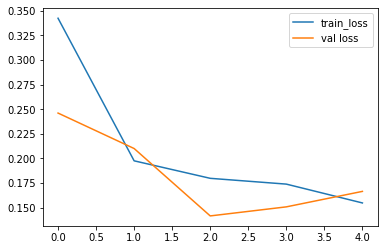

In [ ]:
plt.plot(history_resnet50_model_CLAHE_P_earlystop.history['loss'], label = 'train_loss')
plt.plot(history_resnet50_model_CLAHE_P_earlystop.history['val_loss'], label ='val loss')
plt.legend()
plt.show()

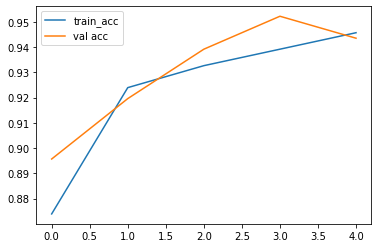

In [ ]:
plt.plot(history_resnet50_model_CLAHE_P_earlystop.history['accuracy'], label = 'train_acc')
plt.plot(history_resnet50_model_CLAHE_P_earlystop.history['val_accuracy'], label ='val acc')
plt.legend()
plt.show()

In [ ]:
model_CLAHE_P_earlystop = load_model('history_resnet50_model_CLAHE_P_earlystop.h5')
score9 = model_CLAHE_P_earlystop.evaluate(training_set_CLAHE_P)
score9

15/15 [==============================] - 25s 2s/step - loss: 0.1327 - accuracy: 0.9522


[0.1326913684606552, 0.9521738886833191]

In [ ]:
score10 = model_CLAHE_P_earlystop.evaluate(test_set_CLAHE_P)
score10

2/2 [==============================] - 3s 430ms/step - loss: 0.5116 - accuracy: 0.8222


[0.5115677714347839, 0.8222222328186035]